### Step4: select a region to analyze Cardiomyocyte and Myoblast

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# transparent background
plt.rcParams.update({
    "figure.facecolor":  (0.0, 0.0, 0.0, 0.0),  
    "axes.facecolor":    (0.0, 0.0, 0.0, 0.0),  
})

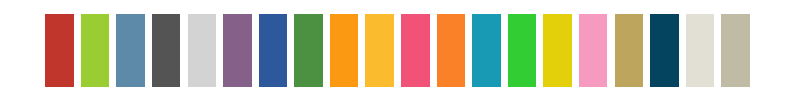

In [3]:
# define colors
purple = '#856088'
pink = '#F25278'
red = '#d96256'
lightgreen = '#93c572'
darkgreen = '#4c9141'
lightblue = '#5d8aa8'
darkblue = '#284d88'
white = '#fafafa'
lightgray = '#d3d3d3'
darkgray ='#545454'
lightorange = '#fabc2e'
darkorange = '#fb9912'
lightyellow = '#e4d00a'
lightgreen2 = '#32CD32'
lightblue2 = '#189AB4'
darkblue2 = '#05445E'
lightpink = '#F79AC0'
darkorange2 = '#FA8128'
darkyellow = '#BDA55D'
lightgray2 = '#E2E0D4'
lightgray3 = '#BFBBA4'

colors = [
    red, lightorange, lightgreen, lightblue, darkblue, 
    darkgray, lightgray, purple, darkgreen, darkorange,
    pink, darkorange2, lightblue2, lightgreen2, lightyellow,
    lightpink, darkyellow, darkblue2, lightgray2, lightgray3
]

plt.figure(figsize=(10, 1.5))
plt.bar(range(len(colors)), height=1, color=colors)
__ = plt.axis('off')

#### load data

In [4]:
# load ella (full) input
path = 'input/stereoseq_data_dict.pkl'
data_dict = pd.read_pickle(path)
print(data_dict.keys())

dict_keys(['type_list', 'gene_list_dict', 'cell_list_dict', 'cell_list_all', 'cell_mask_df', 'data_df'])


In [5]:
cell_mask_df = data_dict['cell_mask_df']
df = data_dict['data_df']
df.head()

,gene,x,y,umi,xr,yr,cell_r,centerX_r,centerY_r,centerX,...,cell,sc_xrange,sc_yrange,sc_xmin,sc_xmax,sc_ymin,sc_ymax,sc_total,sc_ngene,type
140,Cr1l,29228,15955,1,3228,6455,49512,3234,6442,29234,...,49512,20,25,29225,29245,15933,15958,736,442,8
454,Cr1l,28116,13051,1,2116,3551,33156,2114,3556,28114,...,33156,15,27,28106,28121,13042,13069,825,408,14
459,Cr1l,26934,12445,1,934,2945,15337,946,2941,26946,...,15337,27,14,26928,26955,12435,12449,671,340,2
532,Cd46,26126,10847,1,126,1347,2251,123,1360,26123,...,2251,22,21,26114,26136,10847,10868,1004,507,5
546,Gm16897,28922,12434,1,2922,2934,45268,2919,2935,28919,...,45268,17,19,28910,28927,12424,12443,491,294,23


#### select a subregion

In [6]:
# marker genes
markers = [
    ['Myl2', 'Myh7', 'Tnnt2'], #1 Cardiomyocyte
    ['Col2a1', 'Col9a1', 'Col11a1', 'Runx2'], #2 Chondrocyte
    ['Ttr','Enpp2', 'Igfbp2'], #3 Choroid plexus
    ['Tfap2b', 'Lhx9', 'Zic1'], #4 Dorsal midbrain neuron
    ['Nefl', 'Nefm', 'Sncg'], #5 Ganglion
    ['Pecam1', 'Kdr','Ptprm'], #6 Endothelial cell
    ['Krt4', 'Krtdap', 'Krt10'], #7 Keratinocyte
    ['Krt19', 'Epcam', 'Krt8', 'Krt5', 'Adh1', 'Foxp2'], #8 Epithelial cell
    ['Hba-a2', 'Hba-a1', 'Hbb-bs'], #9 Erythrocyte
    ['Trps1', 'Pax3', 'Wnt5a'], #10 Facial fibroblast
    ['Col1a2', 'Col3a1', 'Dcn'], #11 Fibroblast
    ['Neurod6', 'Tbr1', 'Neurod2'], #12 Forebrain neuron
    ['Fabp7', 'Sox2', 'Pou3f3'], #13 Forebrain radial glia
    ['Afp', 'Alb'], #14 Hepatocyte
    ['S100a8', 'S100a9'], #15 Immune cell
    ['Mecom', 'Gas2', 'Ebf1'], #16 Limb fibroblast
    ['Mrc1', 'C1qc', 'Csf1r'], #17 Macrophage
    ['Ptgds', 'Trpm3', 'Ranbp3l'], #18 Meninges cell
    ['Rtn1', 'Nnat', 'Stmn2'], #19 Mid-/hindbrain and spinal cord neuron
    ['Acta1', 'Myl1', 'Myh3'], #20 Myoblast
    ['Gstm1', 'Ebf2', 'Fstl5'], #21 Olfactory epithelial cell
    ['Fabp7', 'Sox2', 'Slc1a3'], #22 Radial glia
    ['Acta2', 'Myh11', 'Tagln'], #23 Smooth muscle cell
    ['Npy', 'Cck', 'Lingo2'], #24 Spinal cord neuron
    ['Tcf712', 'Ntng1', 'Tenm2'] #25 Diencephalon neuron
] 

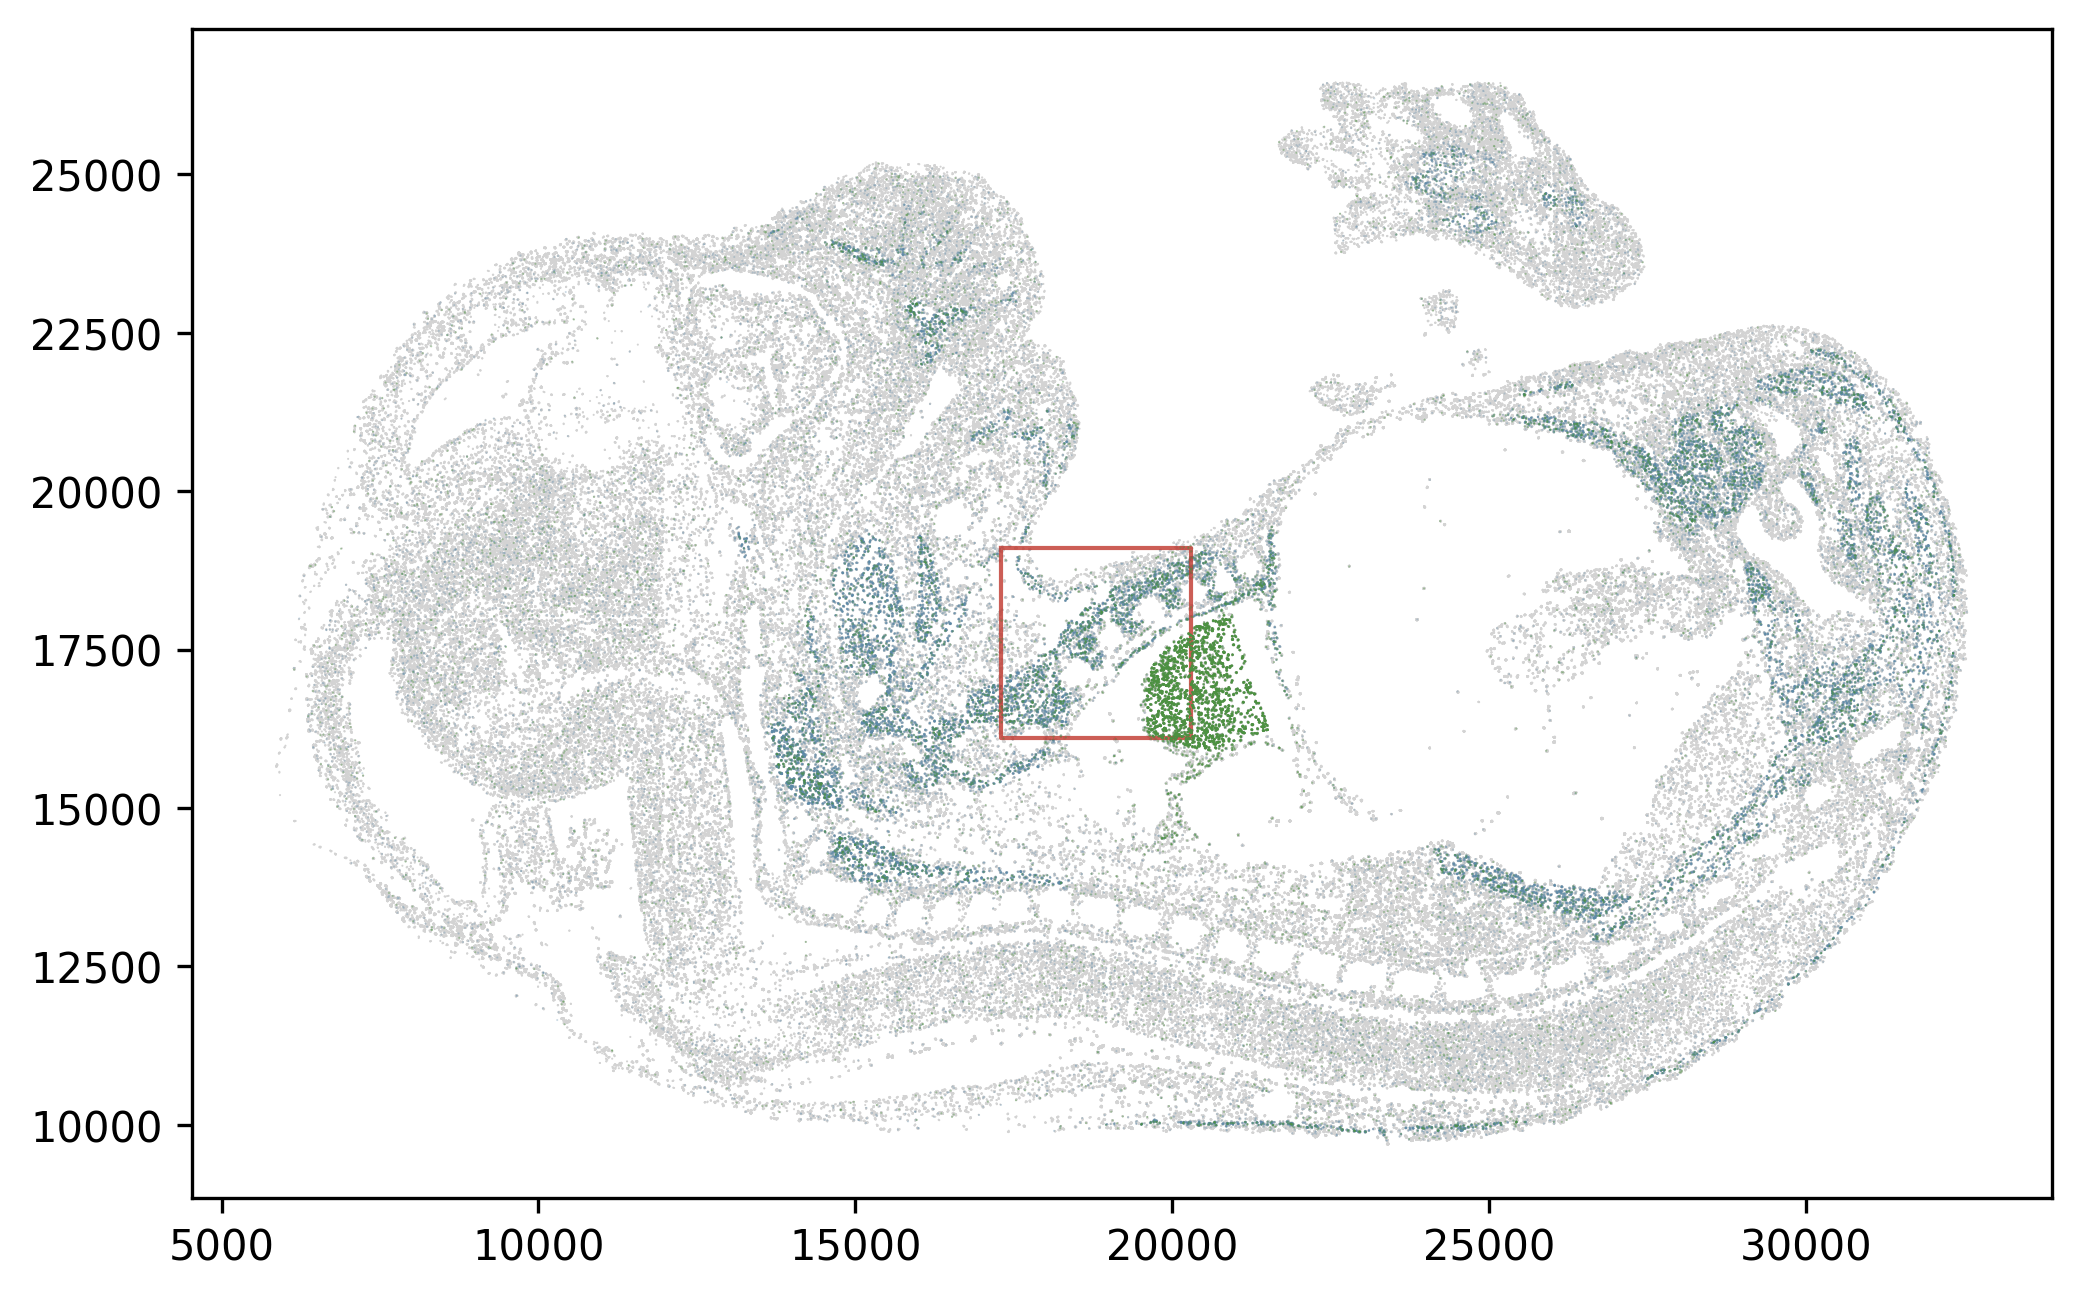

In [45]:
# type Cardiomyocyte and Myoblast marker genes
nr = 1
nc = 1
ss_nr = 8
ss_nc = 8
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

gl = markers[8]
df_gl = df[df.gene.isin(gl)]
ax.scatter(df_gl.x, df_gl.y, 
           marker='.', 
           edgecolor='none',
           s=1, 
           color=lightgray, 
           zorder=1,
           alpha=1)
gl = markers[19]
df_gl = df[df.gene.isin(gl)]
ax.scatter(df_gl.x, df_gl.y, 
           marker='.', 
           edgecolor='none',
           s=1, 
           color=lightblue, 
           zorder=2,
           alpha=0.3)
gl = markers[0]
df_gl = df[df.gene.isin(gl)]
ax.scatter(df_gl.x, df_gl.y, 
           marker='.', 
           edgecolor='none',
           s=1, 
           color=darkgreen, 
           zorder=3,
           alpha=0.4)

ax.plot([17300, 20300, 20300, 17300, 17300],
        [19100, 19100, 16100, 16100, 19100],
        lw=1,
        alpha=0.8,
        color=red)

ax.set_aspect('equal', adjustable='box')

# ax.axis('off')
# plt.savefig(f'figs/E1S3_t8t2t20.png', dpi=300, bbox_inches='tight')

In [9]:
# cells in the above subregion
df_sub = df[(df.x>=17300)&(df.x<=20300)&(df.y>=16100)&(df.y<=19100)&(df.type.isin(['1','20']))]
tmp = df_sub.groupby('cell').first()
print(tmp.groupby('type').size())

type
1     553
20    596
dtype: int64


#### select genes

In [10]:
##### filtering params
# 1. min #cells available for a gene
nc_avl_min = 30 # 50
# 2. >=`nc_expr_thre` number of cells with gene counts>=`expr_thre`
expr_thre = 1
nc_expr_thre = 1
# 3. sort the genes and get the df

In [11]:
# 1. nc_avl_min
gene_list_dict1 = {}
df_dict1 = {}
for t in ['1','20']:
    df_t = df_sub[df_sub.type==t]
    nc_avl_t = df_t.groupby('gene')['cell'].nunique()
    nc_avl_t_filtered = nc_avl_t[nc_avl_t>=nc_avl_min]
    gene_list_dict1[t] = nc_avl_t_filtered.index.to_numpy()
    df_dict1[t] = df_t[df_t.gene.isin(gene_list_dict1[t])]
    print(f'type {t} #genes={len(gene_list_dict1[t])}')

type 1 #genes=1743
type 20 #genes=2008


In [12]:
# 2. nc_expr_thre and expr_thre
gene_list_dict2 = {}
for t in ['1','20']:
    df_t = df_dict1[t]
    df_t_gbG = df_t.groupby('gene')
    gl_t = []
    for g in gene_list_dict1[t][:]:
        df_t_g = df_t_gbG.get_group(g)
        sc_umi_g = df_t_g.groupby('cell')['umi'].sum()
        if np.sum(sc_umi_g>=expr_thre)>=nc_expr_thre:
            gl_t.append(g)
    gene_list_dict2[t] = np.array(gl_t)
    print(f'type {t} #genes={len(gl_t)}')

type 1 #genes=1743
type 20 #genes=2008


In [13]:
# 3. get the df and sort the genes
gene_list_dict3 = {}
cell_list_dict3 = {}
df_dict3 = {}
for t in ['1','20']:
    gl_t2 = gene_list_dict2[t]
    df_t = df_dict1[t]
    df_t3 = df_t[df_t.gene.isin(gl_t2)]
    gl_t3 = df_t3.groupby('gene')['umi'].sum().sort_values(ascending=False).index.to_numpy()
    gene_list_dict3[t] = gl_t3
    df_dict3[t] = df_t3
    cell_list_dict3[t] = df_t3.cell.unique().tolist()

In [14]:
sub_data_df = pd.concat(list(df_dict3.values()))
sub_gene_list_dict = gene_list_dict3
sub_cell_list_dict = cell_list_dict3
sub_cell_list_all = [item for sublist in list(sub_cell_list_dict.values()) for item in sublist]
sub_cell_mask_df = cell_mask_df[cell_mask_df.cell.isin(sub_cell_list_all)]

#### save data

In [15]:
##### save data
outfile = 'input/stereoseq_data_sub_dict.pkl'
# save
pickle_dict = {}
pickle_dict['type_list'] = ['1', '20']
pickle_dict['gene_list_dict'] = sub_gene_list_dict
pickle_dict['cell_list_dict'] = sub_cell_list_dict
pickle_dict['cell_list_all'] = sub_cell_list_all
pickle_dict['cell_mask_df'] = sub_cell_mask_df
pickle_dict['data_df'] = sub_data_df
with open(outfile, 'wb') as f:
    pickle.dump(pickle_dict, f)

# load
# with open(outfile, 'rb') as f:
#     pickle_dict = pickle.load(f)
# registered_dict = pickle_dict['df_registered']